# Visualization in Python

In this project, we'll work through munging a data set and creating visualizations related to trends in the airline industry in the middle of the last century. You'll get started using [MatPlotLib](https://matplotlib.org/), a very powerful and popular plotting library in Python that is covered in this week's course materials.

In [0]:
# Install the pydataset package. This package gives us data sets to work with very easily
! pip install pydataset

In [0]:
# The convention for importing matplotlib with an alias is "plt". We'll also need pandas and numpy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## The Air Passengers Dataset

This dataset shows the number of passengers flying United States airlines by month from 1949-1960. Your job is to do various data munging operations on this dataset to clean it up and prepare it for several visualizations. You will then determine what code is needed to generate those visualizations.

In [0]:
from pydataset import data

passengers = data('AirPassengers')

Ugh. When we examine the head of this datset, we can see that the years are in decimal form rather than month and year.

NOTE: The times are represented by twelfths. i.e. 1949.00000 = 149 0/12 (January). 1949.083333 = 1949 1/12 (February), and so on.

In [0]:
#passengers.head(12)
passengers.shape
passengers.head(12)
#passengers['month'] = passengers.time.astype(str).str.extract('\.(.*)').astype(float)
#passengers['month'] = passengers.time.astype(str).str.extract('\.(.*)')
#df['column_name'] = df['column_name'].fillna(0).astype(int)
#passengers['month'] = passengers['month'].fillna(0).astype(int)
#passengers
#os.getcwd()


,time,AirPassengers
1,1949.000000,112
2,1949.083333,118
3,1949.166667,132
4,1949.250000,129
5,1949.333333,121
6,1949.416667,135
7,1949.500000,148
8,1949.583333,148
9,1949.666667,136
10,1949.750000,119


## The decimal years complicate the EDA work

We need to deal with this by making explicit month and year columns. It is common to have to reformat columns like this in a dataframe

## #1 Add a 'year' column to passengers that reflects the current year

In [0]:
from math import floor
from math import trunc
passengers['year'] = passengers['time'].apply(lambda x: floor(x))
passengers.head(10)

,time,AirPassengers,year
1,1949.000000,112,1949
2,1949.083333,118,1949
3,1949.166667,132,1949
4,1949.250000,129,1949
5,1949.333333,121,1949
6,1949.416667,135,1949
7,1949.500000,148,1949
8,1949.583333,148,1949
9,1949.666667,136,1949
10,1949.750000,119,1949


## #2 Add a "month" column

Set this up in such a way that January is represented with a 1, February with a 2, etc.

In [0]:
# Next, I'll create a new dataframe with the months and their decimal equivalents.
# I'll join that back on the original dataframe.

def truncate(x):
  x_trunc = x - floor(x)
  x_trunc = round(x_trunc,2)
  return(x_trunc)

passengers['decimal_month'] = passengers['time'].apply(lambda x: truncate(x))

In [0]:
df_months = pd.DataFrame()
df_months['decimal_month'] = passengers['decimal_month'][0:12]
df_months['month'] = list(range(12))
df_months['month'] +=1
df_months['month_name'] = ['January', 'Februray', 'March', 'April', 'May', 
                           'June', 'July', 'August', 'September', 'October',
                           'November', 'December']

In [0]:
passengers = passengers.join(df_months.set_index('decimal_month'), on='decimal_month')
passengers.head()

,time,AirPassengers,year,decimal_month,month,month_name
1,1949.000000,112,1949,0.00,1,January
2,1949.083333,118,1949,0.08,2,Februray
3,1949.166667,132,1949,0.17,3,March
4,1949.250000,129,1949,0.25,4,April
5,1949.333333,121,1949,0.33,5,May


## #3 Generate the plot below of passengers vs. time using each monthly count

<a href='https://drive.google.com/file/d/1PdaXbkCVzUXBnUP6c6cLP3nZ94ShSLg1/view?usp=embed_facebook&source=ctrlq.org'><img src='https://lh4.googleusercontent.com/7EHckqyjefS7rN8-gAtj2SgSyKfV3wlTnGKqCwzOf85F6NYlqYQbz7bDfWw=w2400' /></a>

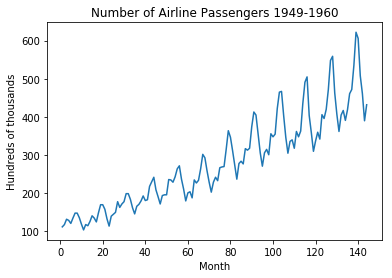

In [0]:
passengers.head(5)
plt.plot(passengers['AirPassengers'])
plt.title("Number of Airline Passengers 1949-1960")
plt.ylabel("Hundreds of thousands")
plt.xlabel("Month")
plt.show()

## #4 Generate the plot below of passengers vs. time using an annual count

<a href='https://drive.google.com/file/d/19WYHQR7sFgaeN5ZHlwx5x1-o-wxJ4weW/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh4.googleusercontent.com/2gbHNgm8UhbCEevaUBpMUSvVgk_6QuxMASqn9-wK1NdzrDXrcF-VIWK_o08=w2400' /></a>

Text(0.5, 0, 'Year')

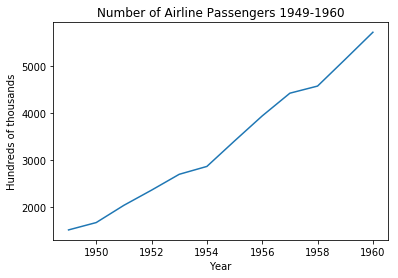

In [0]:
# TODO
# Passengers vs time by year
passengers_yearly = passengers.groupby('year').sum()[['AirPassengers']]
plt.plot(passengers_yearly['AirPassengers'])
plt.title("Number of Airline Passengers 1949-1960")
plt.ylabel("Hundreds of thousands")
plt.xlabel("Year")


## #5 Generate the barplot below of passengers by year

<a href='https://drive.google.com/file/d/1-4NF40zvVhwi6RWagJu98BaBuDNOXaEd/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh6.googleusercontent.com/IQRk35KApDIxYtHGH3WoczLnCvHCRdMNlHw64rgLWPYUostOoAn2hxp8lZA=w2400' /></a>

Text(0.5, 0, 'Year')

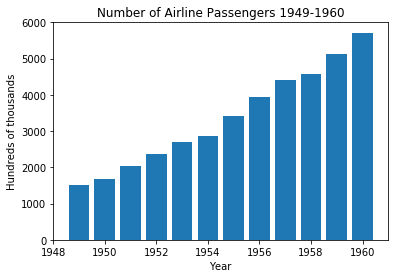

In [0]:
plt.bar(x = passengers_yearly.index, height = passengers_yearly['AirPassengers'])
plt.title("Number of Airline Passengers 1949-1960")
plt.ylabel("Hundreds of thousands")
plt.xlabel("Year")

## #6 Generate the histogram below of monthly passengers

**Additional requirements:**

* Only include 1955 and beyond
* Use a binwidth of 50, a min of 200, and a max of 700
* Set the yticks to start at 0, end at 25 by interval of 5

In [0]:
#matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
N_points = 100000
n_bins = 200

# Generate a normal distribution, center at x=0 and y=5
#x = np.random.randn(N_points)
#y = .4 * x + np.random.randn(100000) + 5

x = Year
y = Airpassenger_yr_sum

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)
data1 ={'Year': [1955, 1956, 1957, 1958, 1959, 1960], 'Airpassenger_yr_sum': [3408, 3939, 4421, 4572, 5140, 5741]}
df1 = pd.DataFrame(data1) 
df1.plot(x ='Airpassenger_yr_sum', y='Year', kind = 'hist')
#from datetime import datetime
#start_date = datetime(1955, 1, 1)
#end_date = datetime(1960, 12, 1)
#date_set[(start_date <=data_set.index ) & (data_set.index <= end_date)].plot(grid=True)



Text(0.5, 0, 'Hundreds of thousands')

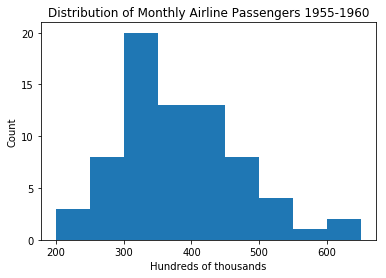

In [0]:
bins = np.arange(200, 700, 50)
yticks = np.arange(0, 25, 5) 
plt.hist(passengers['AirPassengers'][passengers['year']>=1955], bins = bins)
plt.yticks(yticks)
plt.title("Distribution of Monthly Airline Passengers 1955-1960")
plt.ylabel("Count")
plt.xlabel("Hundreds of thousands")

<a href='https://drive.google.com/file/d/1mEtvUbnh2LcDDc73LNr_qX984HzgyhiQ/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh6.googleusercontent.com/7I2FzRPSQPyoalFcwH3vTDeB9Gf80OUlaZOs1x9oRRYyQLlHXPU9H-NhSVQ=w2400' /></a>

In [0]:
# TODO

## #7 Generate the histogram below of monthly passengers

**Additional requirements:**

* Generate two groups to compare. Group 1 should be the years 1949-1950. Group 2 should be the years 1959-60.
* Binwidth of 50 from 100 to 700
* yticks from 0 to 24, spaced by 2
* Be sure to include a legend

<a href='https://drive.google.com/file/d/1gqJbBVOPIurYikUIDpXoAF3gZx2p8lUA/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh3.googleusercontent.com/Ok91nFY8Srjn1FpVwOil9ycH9y6isZejTqi7hifqaEA5E3tWpkwldWVLo3U=w2400' /></a>

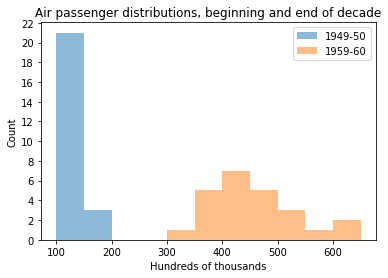

In [0]:
# TODO
# Histogram of passengers comparing two years
passengers_49_50 = passengers[passengers['year'] <= 1950] 
passengers_59_60 = passengers[passengers['year'] >= 1959]


bins = np.arange(100, 700, 50)
yticks = np.arange(0, 24, 2) 

plt.hist(passengers_49_50['AirPassengers'], bins, alpha=0.5, label='1949-50')
plt.hist(passengers_59_60['AirPassengers'], bins, alpha=0.5, label='1959-60')
plt.legend(loc='upper right')
plt.yticks(yticks)
plt.title("Air passenger distributions, beginning and end of decade")
plt.ylabel("Count")
plt.xlabel("Hundreds of thousands")
plt.show()

## #8 Generate the time plot below

**Additional requirements:**

* Compare 1950, 1955, and 1960 by month

<a href='https://drive.google.com/file/d/11nVH5EiYxxtJ48isS9VLtwLIjn0hALXV/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh3.googleusercontent.com/SKfWqBE324A__VS8V-TBqMQXHWE9OUjVoJyeyJME8uJzyfWS73aaCms7A3c=w2400' /></a>

In [0]:
# TODO
passengers_50 = passengers[passengers['year'] == 1950] 
passengers_55 = passengers[passengers['year'] == 1955]
passengers_60 = passengers[passengers['year'] == 1960]

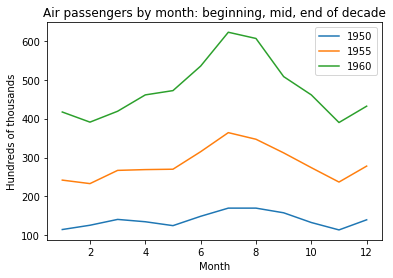

In [0]:
plt.plot(passengers_50['month'], passengers_50['AirPassengers'], label='1950')
plt.plot(passengers_55['month'], passengers_55['AirPassengers'], label='1955')
plt.plot(passengers_60['month'], passengers_60['AirPassengers'], label='1960')
plt.legend(loc='upper right')
plt.title("Air passengers by month: beginning, mid, end of decade")
plt.ylabel("Hundreds of thousands")
plt.xlabel("Month")
plt.show()

## #9 Tell a story

* If you could only use one of these plots to tell a story about air travel trends mid-centry, which would you use and why?


In [0]:
#1.The count of passengers grow year over year
#2.The number of passenger from 1949-1960 grow every year and there is no decline in the number of people travel during this period.
#3. The histogram is skewed to the right for the passengers, the mean is 20 and the median is 10 count for the year 1955- 1960.
#4. For the end of the decade histogram comparison  1949 -1950 passengers is higher compared to the 1959 -1960 during that decade
#5. The line graph For the years in 1950 , 1955, 1960 the data shows that during the month of Jun, July and August has the higher number passengers travel.



In [0]:
# TODO
! pwd